# Modelo segmentación

## Consideraciones

$
categoria(nota)= \left\{ \begin{array}{lcc}
             1 & si  & nota \geq 6.0 \\            
             \\ 2 & si & 5.0 \leq nota \leq 5.9\\
             \\ 3 & si & 4.0 \leq nota \leq 4.9\\
             \\ 4 & si & 3.0 \leq nota \leq 3.9\\
             \\ 5 & si & nota \leq 2.9
             \end{array}
   \right.
$

Los candidatos a tutoría serán aquellos que estén en la categoría 4 o 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.decomposition import PCA

import matplotlib.cm as cm

## Carga de datos

In [2]:
!wget https://www.dropbox.com/s/3rgq7lu6hivjnue/Simulation_data.csv
!wget https://www.dropbox.com/s/tupkzbyxedh2q29/Simulate_Data_01.csv

--2022-02-12 21:39:50--  https://www.dropbox.com/s/3rgq7lu6hivjnue/Simulation_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3rgq7lu6hivjnue/Simulation_data.csv [following]
--2022-02-12 21:39:50--  https://www.dropbox.com/s/raw/3rgq7lu6hivjnue/Simulation_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca87aea947c3a0618c47b3d0bc9.dl.dropboxusercontent.com/cd/0/inline/Bfn4rTunDvW4tWu1Eq2zzVeiD7g3kvmYbwcSru_6gAxryYF3EzuCOu44butzpnn1chPtEqg6-sXIYkT3yYaeZJEC_GTHscdslBWV_Q-DDXIl0UF9ny6VUgS3WVltQAAKP9t_csnlenj8AHN9yf3ajQ83/file# [following]
--2022-02-12 21:39:51--  https://uca87aea947c3a0618c47b3d0bc9.dl.dropboxusercontent.com/cd/0/inline/Bfn4rTunDvW4tWu1Eq2zzVeiD7g3kvmYbwcSru_6gAxryYF3EzuCOu44butzpnn1ch

In [3]:
#file_name = "Simulate_Data_01.csv"
file_name = "Simulation_data.csv"
data_frame = pd.read_csv(file_name) 
data_frame.head()

,ID,I1,I2,I3,I4,I5,I6,I7,I8,PUNTAJE,NOTA,CATEGORIA
0,1,1.0,4.0,2.0,2.0,2.0,3.0,2.0,5.0,21.0,3.6,4
1,2,1.0,4.0,2.0,1.0,2.0,3.0,2.0,5.0,20.0,3.5,4
2,3,1.0,1.0,5.0,3.0,2.0,2.0,5.0,3.0,22.0,3.8,4
3,4,5.0,3.0,5.0,5.0,1.0,2.0,5.0,5.0,31.0,5.3,2
4,5,1.0,1.0,5.0,2.0,3.0,3.0,5.0,3.0,23.0,3.9,4


## Estandarización de las columnas

In [4]:
data_frame.columns = data_frame.columns.str.lower().str.replace(" ", "", regex=False)
data_frame.columns = data_frame.columns.str.lower().str.replace(".", "_", regex=False)

## Cálculo de columnas derivadas


## Análisis exploratorio

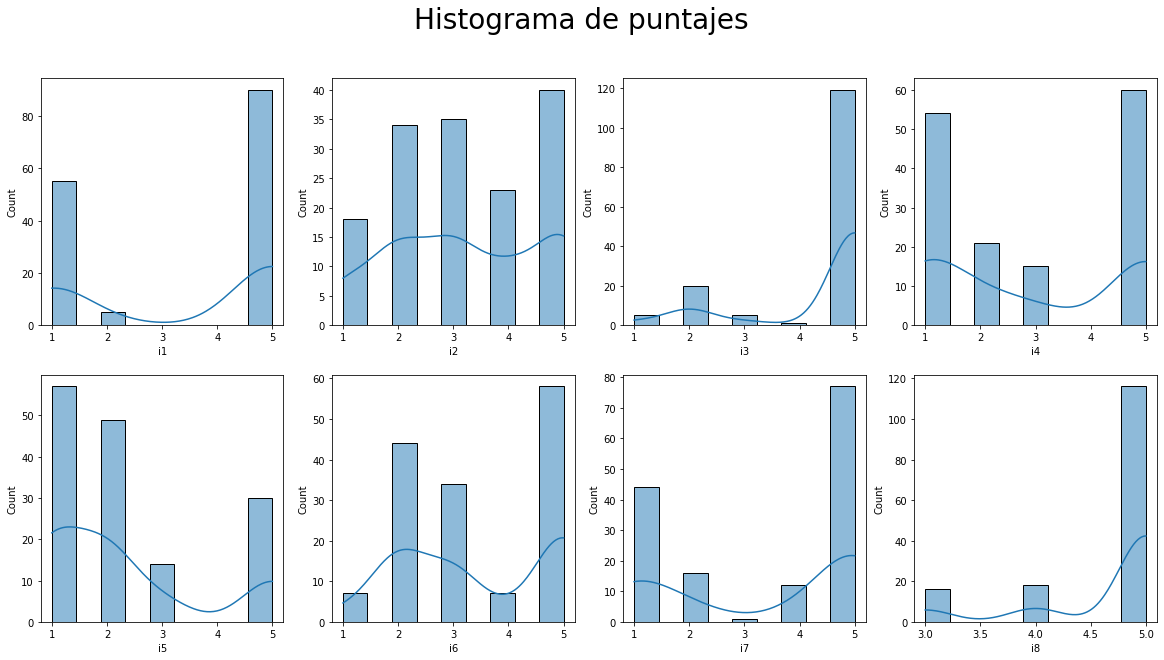

In [5]:
lst_feature = ['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8']
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Histograma de puntajes", fontsize=28)
row, col = 0, 0
for feature in lst_feature:  
  sns.histplot(data_frame[feature], ax=ax[row][col], kde=True) 
  col += 1
  row += 0 if col < 4 else 1
  col = 0 if col > 3 else col
plt.show()

In [6]:
selected = data_frame.columns.difference(['id', 'categoria'])
data_frame[selected].describe()

,i1,i2,i3,i4,i5,i6,i7,i8,nota,puntaje
count,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.433333,3.22000,4.393333,2.940000,2.313333,3.433333,3.413333,4.666667,4.771333,27.813333
std,1.933167,1.37509,1.231012,1.788216,1.479782,1.377756,1.806724,0.662177,1.003038,5.936336
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.100000,17.000000
25%,1.000000,2.00000,5.000000,1.000000,1.000000,2.000000,1.000000,5.000000,3.825000,22.250000
50%,5.000000,3.00000,5.000000,2.500000,2.000000,3.000000,5.000000,5.000000,5.100000,30.000000
75%,5.000000,5.00000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.300000,31.000000
max,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.400000,37.000000


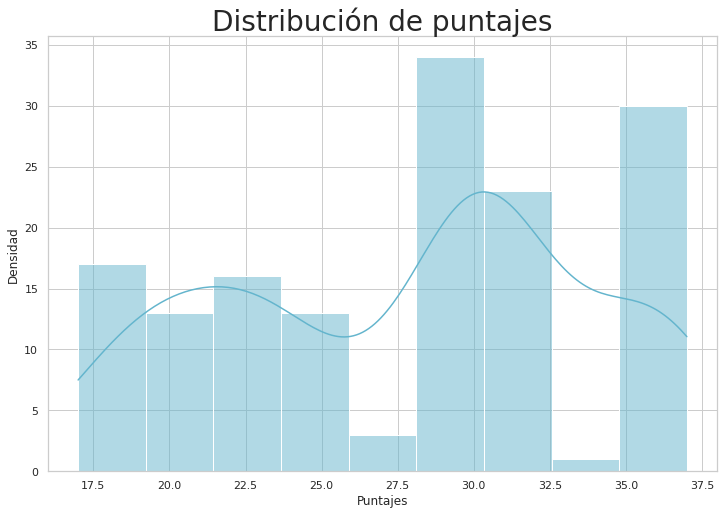

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_frame['puntaje'], kde = True, color = 'c')
plt.title('Distribución de puntajes', fontsize = 28)
plt.xlabel("Puntajes")
plt.ylabel("Densidad")
plt.show();

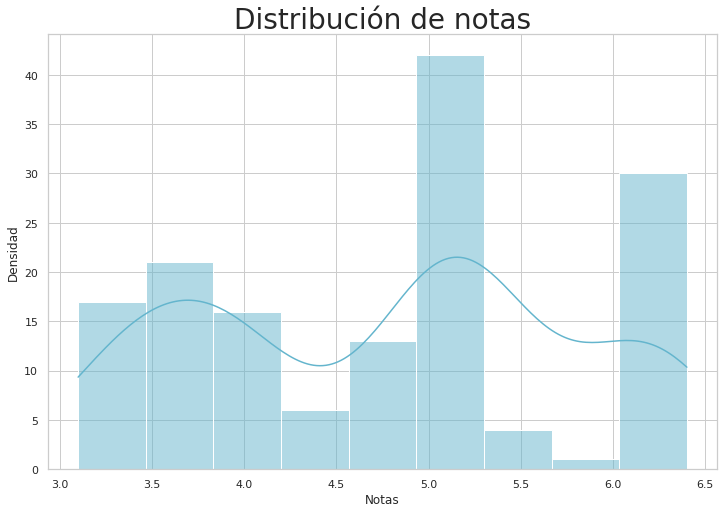

In [9]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_frame['nota'], kde = True, color = 'c')
plt.title('Distribución de notas', fontsize = 28)
plt.xlabel("Notas")
plt.ylabel("Densidad")
plt.show();

In [10]:
data_frame.groupby("categoria").size()

categoria
1    30
2    47
3    27
4    46
dtype: int64

## Selección de candidatos a tutoría

In [11]:
data_selected = data_frame.query("categoria >= 4")
data_selected.shape

(46, 12)

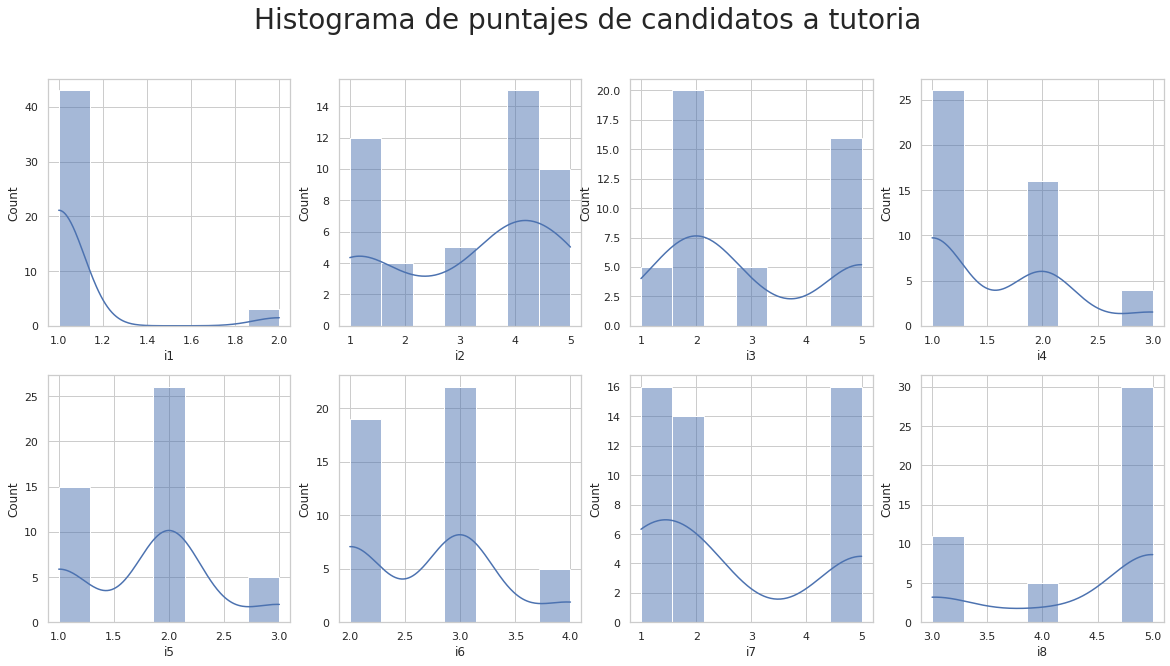

In [12]:
lst_feature = ['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8']
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Histograma de puntajes de candidatos a tutoria", fontsize=28)
row, col = 0, 0
for feature in lst_feature:  
  sns.histplot(data_selected[feature], ax=ax[row][col], kde=True) 
  col += 1
  row += 0 if col < 4 else 1
  col = 0 if col > 3 else col
plt.show()

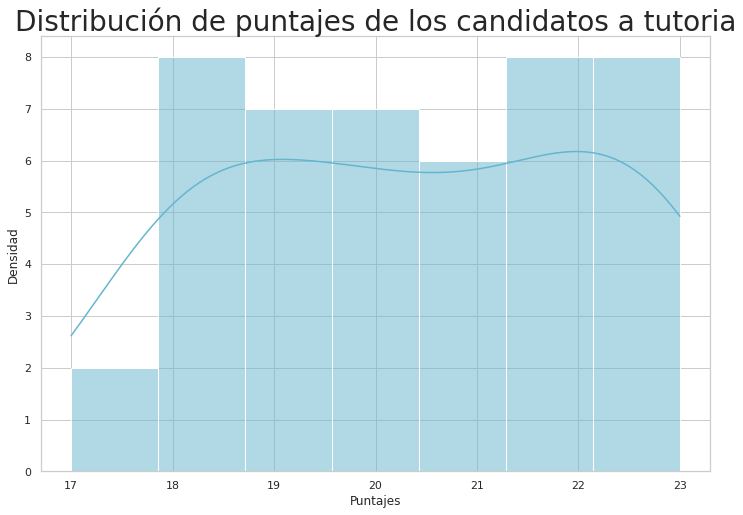

In [17]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_selected['puntaje'], kde = True, color = 'c')
plt.title('Distribución de puntajes de los candidatos a tutoria', fontsize = 28)
plt.xlabel("Puntajes")
plt.ylabel("Densidad")
plt.show();

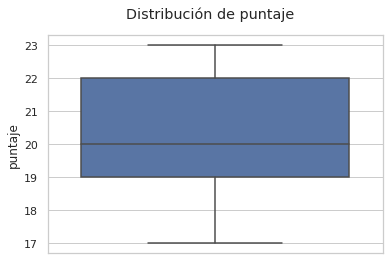

In [13]:
# Revisión de outliers
ax= sns.boxplot(y="puntaje", data=data_selected)
plt.suptitle("Distribución de puntaje");

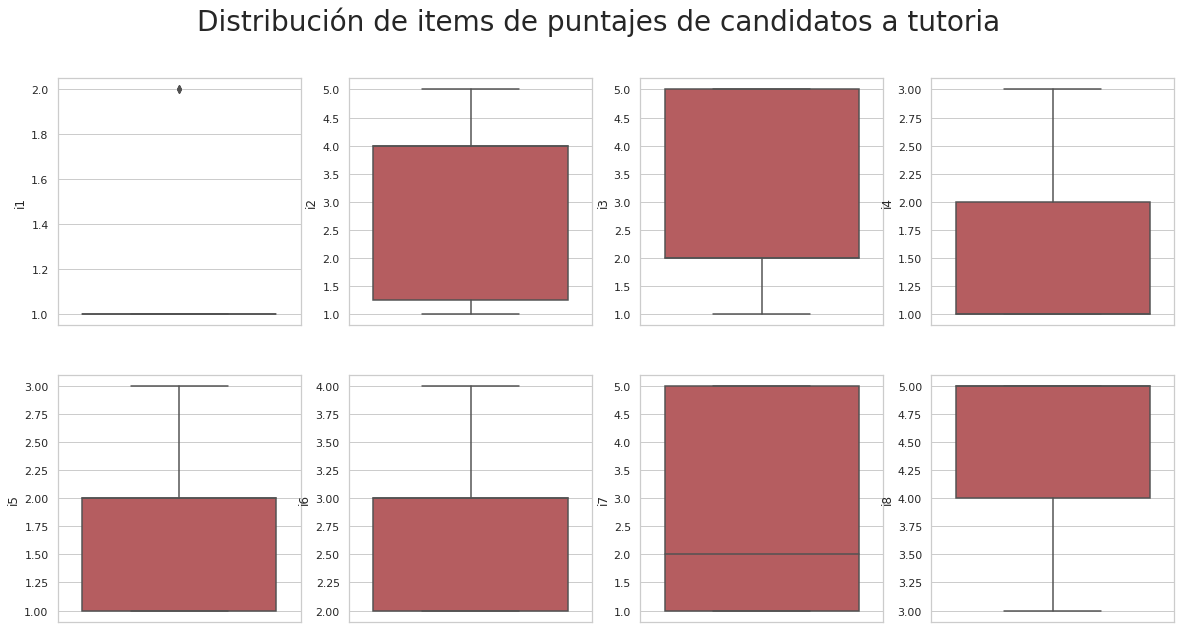

In [15]:
lst_feature = ['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8']
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("Distribución de items de puntajes de candidatos a tutoria", fontsize=28)
row, col = 0, 0
for feature in lst_feature:  
  sns.boxplot(y=data_selected[feature], ax=ax[row][col], data=data_selected, color="r")
  col += 1
  row += 0 if col < 4 else 1
  col = 0 if col > 3 else col
plt.show()

In [16]:
pd.cut(data_selected.nota, bins=[1.0,2.0,3.0,4.0]).value_counts()

(3.0, 4.0]    46
(1.0, 2.0]     0
(2.0, 3.0]     0
Name: nota, dtype: int64

In [17]:
data_selected.groupby('categoria')[['puntaje','nota']].describe()

puntaje                                   ... nota                    
            count       mean       std   min   25%  ...  min  25%  50%  75%  max
categoria                                           ...                         
4            46.0  20.369565  1.889841  17.0  19.0  ...  3.1  3.4  3.5  3.8  3.9

[1 rows x 16 columns]

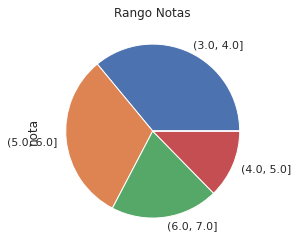

In [18]:
data = pd.cut(data_frame.nota, bins=[1.0,2.0,3.0,4.0,5.0,6.0,7.0]).value_counts()
data.plot(kind="pie", title="Rango Notas");

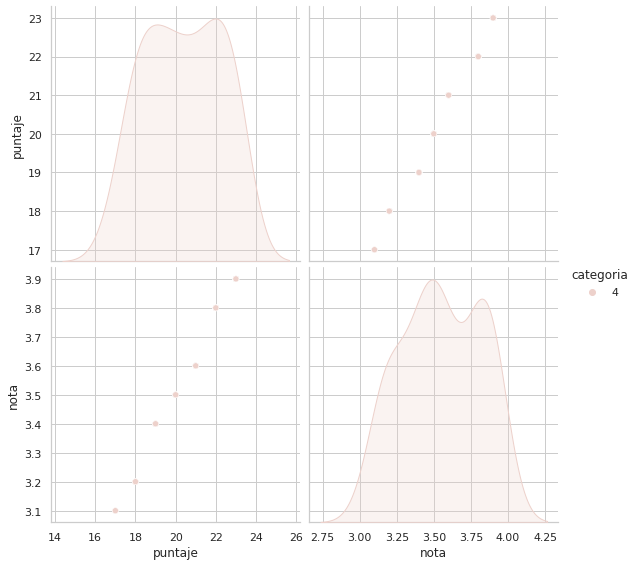

In [19]:
	sns.pairplot(data_selected, hue='categoria',height=4,vars=["puntaje","nota"],kind='scatter');

## Escalado de los datos

In [20]:
lst_include = ["i1","i2","i3","i4","i5","i6","i7","i8"]
exclude = data_selected.columns.difference(lst_include)
X_features = np.array(data_selected[data_selected.columns.drop(exclude)])
y = data_selected.categoria

In [21]:
scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)
print(X_features_scaled.shape)

(46, 8)


## Reducción de la dimensionalidad

El $\textbf{método de componentes principales}$ se usa para explicar la estructura de varianza-covarianzas de una muestra a partir
de unas pocas combinaciones lineales de las variables originales, denominadas $\textit{componentes principales}$

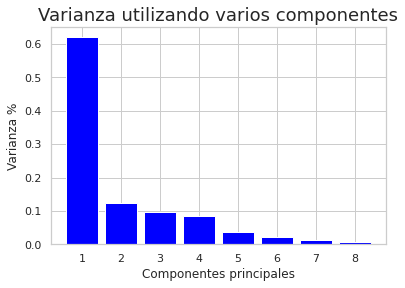

In [22]:
# Plotting the variances for each PC
pca = PCA()
principal_components = pca.fit_transform(X_features_scaled)
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza %')
plt.xticks(PC)
plt.title("Varianza utilizando varios componentes", fontsize=18)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principal_components)

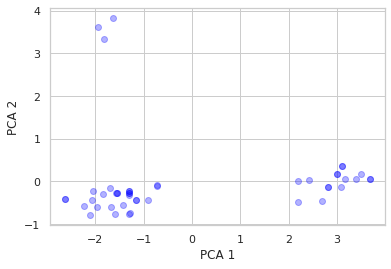

In [23]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

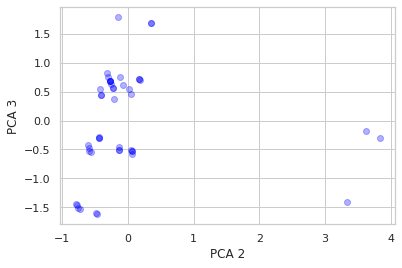

In [25]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.3, color='blue')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.show()

In [31]:
def cluster_by_PCA(n_pca, max_clusters = 11):
  inertias = []

  # Creating 10 K-Mean models while varying the number of clusters (k)
  for k in range(2,max_clusters):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:n_pca])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
  plt.plot(range(2,max_clusters), inertias, '-p', color='red')
  plt.xlabel('Número de cluster, k')
  plt.ylabel('inercia')
  plt.title('Variación de inercias usando PCA {}'.format(n_pca))
  plt.show()

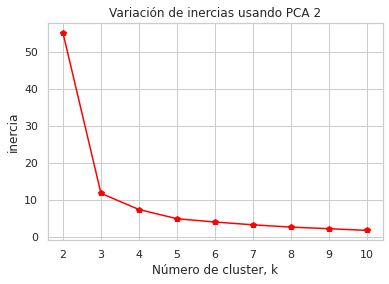

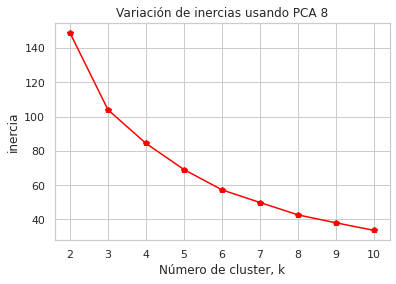

In [32]:
cluster_by_PCA(2); cluster_by_PCA(8); 

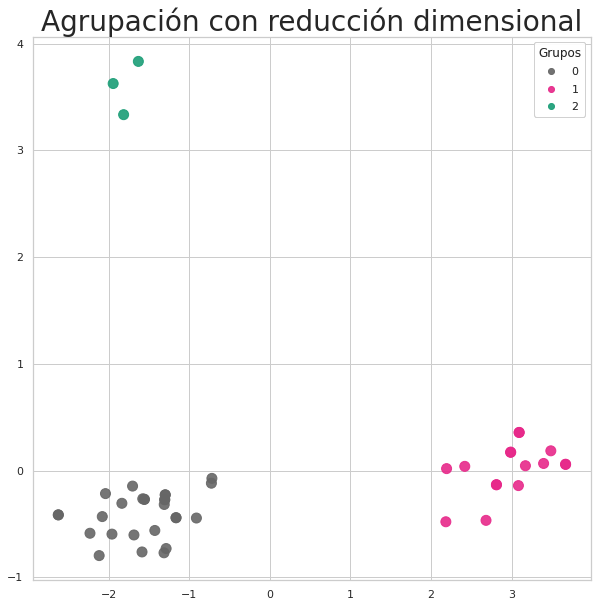

In [33]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])
fig, ax = plt.subplots(figsize=(10,10))
labels = model.predict(PCA_components.iloc[:,:2])
scatter = ax.scatter(PCA_components[0], PCA_components[1], c=labels, cmap="Dark2_r", s=100, alpha=0.9)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Grupos")
ax.add_artist(legend1)
plt.title("Agrupación con reducción dimensional",fontsize=28)
plt.show()

In [34]:
data_final = data_selected.copy()
data_final['grupo'] = labels
data_final

,id,i1,i2,i3,i4,i5,i6,i7,i8,puntaje,nota,categoria,grupo
0,1,1.0,4.0,2.0,2.0,2.0,3.0,2.0,5.0,21.0,3.6,4,0
1,2,1.0,4.0,2.0,1.0,2.0,3.0,2.0,5.0,20.0,3.5,4,0
2,3,1.0,1.0,5.0,3.0,2.0,2.0,5.0,3.0,22.0,3.8,4,1
4,5,1.0,1.0,5.0,2.0,3.0,3.0,5.0,3.0,23.0,3.9,4,1
8,9,1.0,1.0,5.0,2.0,2.0,3.0,5.0,4.0,23.0,3.9,4,1
12,13,1.0,3.0,1.0,1.0,2.0,3.0,2.0,5.0,18.0,3.2,4,0
15,16,1.0,1.0,5.0,3.0,2.0,2.0,5.0,4.0,23.0,3.9,4,1
17,18,1.0,4.0,2.0,1.0,2.0,3.0,2.0,5.0,20.0,3.5,4,0
19,20,1.0,2.0,5.0,2.0,2.0,3.0,5.0,3.0,23.0,3.9,4,1
21,22,1.0,5.0,2.0,2.0,1.0,4.0,1.0,5.0,21.0,3.6,4,0


## Obtención de número óptimo de clusters

### Curva de elbow



In [36]:
def get_cluster_elbow(n_pca, max_clusters = 11, algorithm = None):
  """
  Método curva de elbow para identificar el número óptimo de clusters
  """  
  num_clusters = range(2, max_clusters)
  x_algorithm = "auto" if algorithm is None else algorithm
  models = [KMeans(n_clusters=i, random_state=29, algorithm=x_algorithm) for i in num_clusters]
  score = [models[i].fit(PCA_components.iloc[:,:n_pca]).score(PCA_components.iloc[:,:n_pca]) for i in range(len(models))] 
  inercias = [models[i].inertia_ for i in range(len(models))] 

  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  ax[0].plot(num_clusters, inercias, marker='o')
  ax[0].set_title("Evolución de la varianza intra-cluster total")
  ax[0].set_xlabel('Número clusters')
  ax[0].set_ylabel('Intra-cluster (inertia)');

  ax[1].plot(num_clusters,score)
  ax[1].grid(color='r', linestyle='dotted', linewidth=1)
  ax[1].set_title("Evolución del score total")
  ax[1].set_xlabel('Número de Clusters')
  ax[1].set_ylabel('Score')

  plt.show()



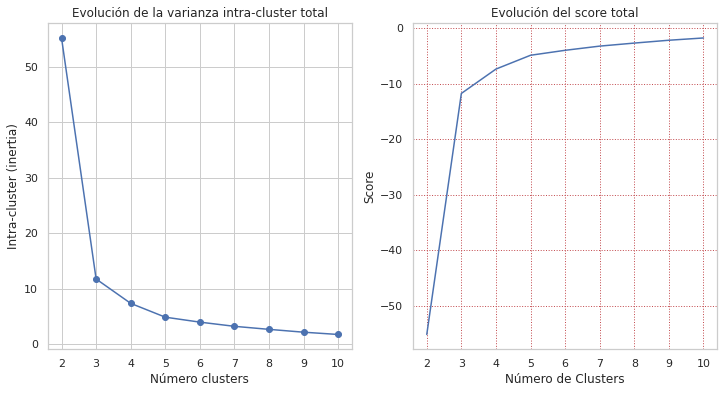

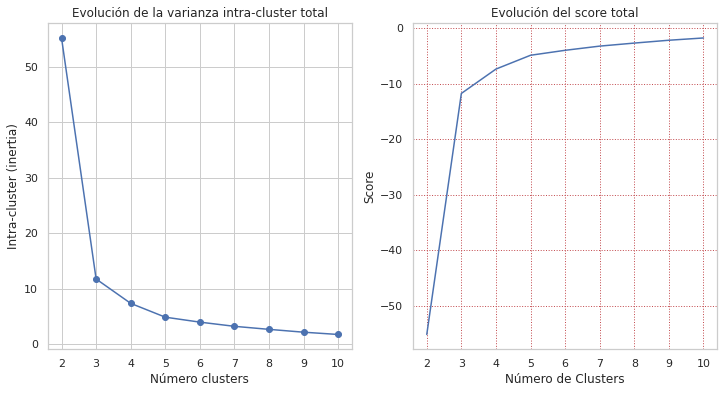

In [37]:
for alg in ['auto', 'elkan']:
  get_cluster_elbow(2,algorithm=alg)

### Método silhouette

In [38]:
def get_cluster_silhoutte(n_pca, max_clusters = 11, algorithm = None):
  """
  Método silhouette para identificar el número óptimo de clusters
  """
  range_n_clusters = range(2, max_clusters)
  valores_medios_silhouette = []

  x_algorithm = "auto" if algorithm is None else algorithm
  for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        random_state = 123, 
                        algorithm = x_algorithm
                    )
    cluster_labels = modelo_kmeans.fit_predict(PCA_components.iloc[:,:n_pca])
    silhouette_avg = silhouette_score(PCA_components.iloc[:,:n_pca], cluster_labels, metric="sqeuclidean")
    valores_medios_silhouette.append(silhouette_avg)
  return list(range(2,max_clusters))[np.argmax(valores_medios_silhouette)], valores_medios_silhouette, range_n_clusters

def graphic_view(range_clusters, values, algorithm):
  fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
  ax.plot(range_clusters, values, marker='o')
  ax.set_title("Evolución de media de los índices silhouette con {}".format(algorithm))
  ax.set_xlabel('Número clusters')
  ax.set_ylabel('Media índices silhouette');


Cluster ideal, usando índices silhouette con algoritmo auto es 3
Cluster ideal, usando índices silhouette con algoritmo elkan es 3


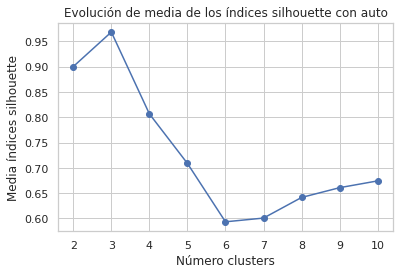

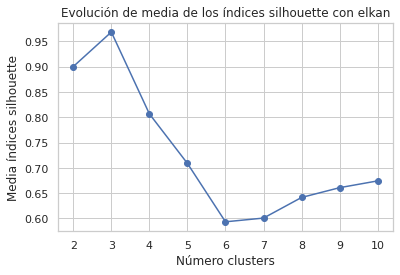

In [40]:
for alg in ['auto', 'elkan']:
  ideal_number, values, rc = get_cluster_silhoutte(2)
  print("Cluster ideal, usando índices silhouette con algoritmo {0} es {1}".format(alg, ideal_number))
  graphic_view(rc, values, alg)

Cluster ideal = 3
 usando índices silhouette con parámetros
 algoritmo auto y N_PCA 8
Cluster ideal = 3
 usando índices silhouette con parámetros
 algoritmo elkan y N_PCA 8


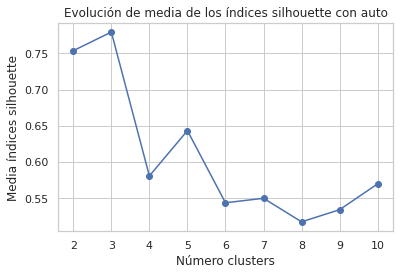

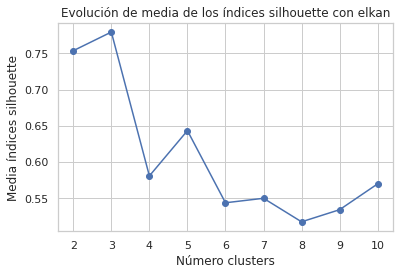

In [41]:
n_pca = 8
for alg in ['auto', 'elkan']:
  ideal_number, values, rc = get_cluster_silhoutte(n_pca)
  print("Cluster ideal = {1}\n usando índices silhouette con parámetros\n algoritmo {0} y N_PCA {2}".format(alg, ideal_number, n_pca))
  graphic_view(rc, values, alg)

### Estadístico de GAP

In [42]:
def get_cluster_GAP(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
      # Holder for reference dispersion results
      refDisps = np.zeros(nrefs)
      # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
      for i in range(nrefs):      
        # Create new random reference set
        randomReference = np.random.random_sample(size=data.shape)
        # Fit to it
        km = KMeans(k)
        km.fit(randomReference)
        refDisp = km.inertia_
        refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


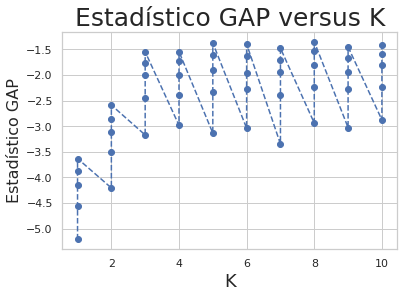

In [45]:
score_g, df = get_cluster_GAP(PCA_components.iloc[:,:2], nrefs=5, maxClusters=11)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K', fontsize=18);
plt.ylabel('Estadístico GAP', fontsize=16);
plt.title('Estadístico GAP versus K', fontsize=25);


## Generación del modelo

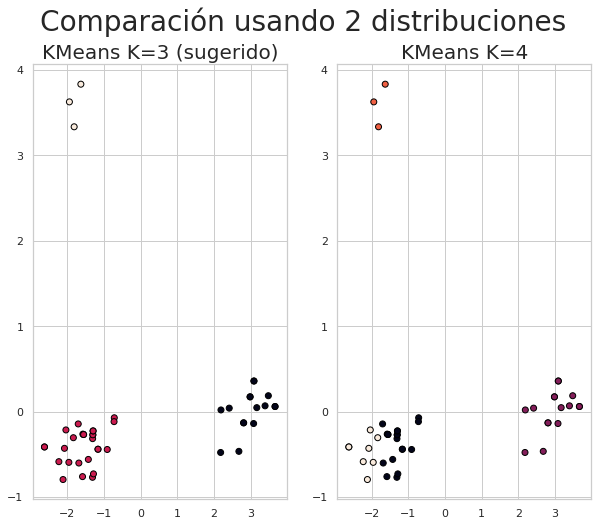

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
x_algorithm = 'auto'
# Resultados para K = valor ideal de acuerdo a los métodos anteriores
# ==============================================================================
modelo_kmeans = KMeans(n_clusters = ideal_number, random_state=29, 
                       algorithm = x_algorithm).fit(X=PCA_components.iloc[:,:2])
y_predict_a = modelo_kmeans.predict(PCA_components.iloc[:,:2])

ax[0].scatter(
        x = PCA_components[0],
        y = PCA_components[1], 
        c = y_predict_a,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K={} (sugerido)'.format(ideal_number), fontsize=20);

# Resultados para K = una unidad más de la propuesta ideal
# ==============================================================================

y_predict_b = KMeans(n_clusters=ideal_number+1, random_state=29, 
                     algorithm = x_algorithm).fit_predict(X=PCA_components.iloc[:,:2])
ax[1].scatter(
        x = PCA_components[0],
        y = PCA_components[1], 
        c = y_predict_b,
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K={}'.format(ideal_number+1), fontsize=20)
plt.suptitle("Comparación usando 2 distribuciones", fontsize=28)
plt.show()

In [47]:
pd.DataFrame(y_predict_a, columns=['grupo']).groupby("grupo").size()

grupo
0    16
1    27
2     3
dtype: int64

## Evaluación usando el coeficiente de Silhouette

In [48]:
print(
    "Silhouette Coefficient: %0.3f"
    % silhouette_score(PCA_components.iloc[:,:2], y_predict_a, metric="sqeuclidean")
)

print(
    "Silhouette Coefficient with euclidian: %0.3f"
    % silhouette_score(PCA_components.iloc[:,:2], y_predict_a)
)

Silhouette Coefficient: 0.969
Silhouette Coefficient with euclidian: 0.848


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

## Análisis de clusters

### Funciones

In [49]:
def get_data_final(data, y_predict):
  data_final = data.copy()
  data_final['grupo'] = y_predict
  data_final['total'] = 1
  return data_final

In [50]:
def get_selected_features(data, features_selected = ['id', 'grupo', 'nota']):
  return data[features_selected]

def get_clusters(data):
  return data['grupo'].unique()

In [51]:
def get_total_by_cluster(data):
  return data.groupby('grupo')[['total']].sum()

In [52]:
def get_metrics_by_cluster(data, columns, metrics):
  return data.groupby('grupo')[columns].aggregate(metrics)

In [53]:
def get_summary_cluster(data, cluster, selected):
  return data[data.grupo == cluster][selected]

### Obtener grupos

In [54]:
data_final_x = get_data_final(data_selected, y_predict_a)
data_final_y = get_data_final(data_selected, y_predict_b)

### Ver resultados

In [55]:
get_selected_features(data_final_x)

,id,grupo,nota
0,1,1,3.6
1,2,1,3.5
2,3,0,3.8
4,5,0,3.9
8,9,0,3.9
12,13,1,3.2
15,16,0,3.9
17,18,1,3.5
19,20,0,3.9
21,22,1,3.6


In [56]:
print(get_clusters(data_final_x))
print(get_clusters(data_final_y))

[1 0 2]
[0 1 3 2]


In [57]:
lst_features_selected = ['id', 'grupo']
df_merge = pd.merge(data_final_x[lst_features_selected], data_final_y[lst_features_selected], how='inner', on='id')
df_merge['equals'] = df_merge.apply(lambda x : x.grupo_x == x.grupo_y, axis=1)
df_merge

,id,grupo_x,grupo_y,equals
0,1,1,0,False
1,2,1,0,False
2,3,0,1,False
3,5,0,1,False
4,9,0,1,False
5,13,1,0,False
6,16,0,1,False
7,18,1,0,False
8,20,0,1,False
9,22,1,3,False


In [58]:
get_total_by_cluster(data_final_x)

,total
grupo,
0,16
1,27
2,3


In [59]:
get_total_by_cluster(data_final_y)

,total
grupo,
0,19
1,16
2,3
3,8


In [60]:
lst_metrics = [np.mean, np.median, np.max, np.min]
get_metrics_by_cluster(data_final_x, lst_include, lst_metrics)

i1                         i2         ...   i7           i8                 
      mean median amax amin      mean median  ... amax amin    mean median amax amin
grupo                                         ...                                   
0      1.0    1.0  1.0  1.0  1.250000    1.0  ...  5.0  5.0  3.3125    3.0  4.0  3.0
1      1.0    1.0  1.0  1.0  4.148148    4.0  ...  2.0  1.0  5.0000    5.0  5.0  5.0
2      2.0    2.0  2.0  2.0  4.333333    4.0  ...  2.0  1.0  5.0000    5.0  5.0  5.0

[3 rows x 32 columns]

In [61]:
lst_features = ['puntaje', 'nota']
get_metrics_by_cluster(data_final_x, lst_features, lst_metrics)

puntaje                         nota                 
            mean median  amax  amin      mean median amax amin
grupo                                                         
0      22.250000   22.5  23.0  20.0  3.806250   3.85  3.9  3.5
1      19.185185   19.0  22.0  17.0  3.388889   3.40  3.8  3.1
2      21.000000   21.0  22.0  20.0  3.633333   3.60  3.8  3.5

In [65]:
df_pivot = data_final_x.pivot_table(values='nota', index='grupo',  aggfunc = [np.median, np.mean, np.min, np.max])
df_pivot

,median,mean,amin,amax
,nota,nota,nota,nota
grupo,,,,
0,3.85,3.806250,3.5,3.9
1,3.40,3.388889,3.1,3.8
2,3.60,3.633333,3.5,3.8


In [66]:
df_pivot = df_pivot.unstack().reset_index()
df_pivot.columns = ['metric','feature','group','value']
df_pivot

,metric,feature,group,value
0,median,nota,0,3.850000
1,median,nota,1,3.400000
2,median,nota,2,3.600000
3,mean,nota,0,3.806250
4,mean,nota,1,3.388889
5,mean,nota,2,3.633333
6,amin,nota,0,3.500000
7,amin,nota,1,3.100000
8,amin,nota,2,3.500000
9,amax,nota,0,3.900000


In [69]:
for grupo in data_final_x.grupo.unique():
  print("-"*50)
  print("Resumen grupo {}".format(grupo))
  print("-"*50)
  print(get_summary_cluster(data_final_x, grupo, selected))

--------------------------------------------------
Resumen grupo 1
--------------------------------------------------
      i1   i2   i3   i4   i5   i6   i7   i8  nota  puntaje
0    1.0  4.0  2.0  2.0  2.0  3.0  2.0  5.0   3.6     21.0
1    1.0  4.0  2.0  1.0  2.0  3.0  2.0  5.0   3.5     20.0
12   1.0  3.0  1.0  1.0  2.0  3.0  2.0  5.0   3.2     18.0
17   1.0  4.0  2.0  1.0  2.0  3.0  2.0  5.0   3.5     20.0
21   1.0  5.0  2.0  2.0  1.0  4.0  1.0  5.0   3.6     21.0
23   1.0  4.0  2.0  1.0  1.0  3.0  1.0  5.0   3.2     18.0
31   1.0  4.0  2.0  1.0  1.0  2.0  2.0  5.0   3.2     18.0
32   1.0  3.0  1.0  2.0  2.0  3.0  2.0  5.0   3.4     19.0
39   1.0  5.0  2.0  1.0  1.0  2.0  2.0  5.0   3.4     19.0
41   1.0  5.0  2.0  1.0  1.0  4.0  1.0  5.0   3.5     20.0
50   1.0  3.0  2.0  1.0  1.0  3.0  1.0  5.0   3.1     17.0
52   1.0  5.0  1.0  1.0  1.0  2.0  1.0  5.0   3.1     17.0
55   1.0  4.0  2.0  1.0  2.0  2.0  1.0  5.0   3.2     18.0
59   1.0  4.0  2.0  1.0  2.0  2.0  1.0  5.0   3.2     18

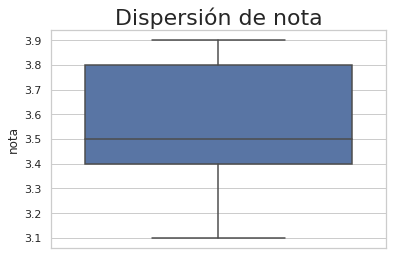

In [73]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y='nota', data= data_final_x)
ax.set_title("Dispersión de nota", fontsize=22);

In [76]:
data_final_x.nota.describe()

count    46.000000
mean      3.550000
std       0.260555
min       3.100000
25%       3.400000
50%       3.500000
75%       3.800000
max       3.900000
Name: nota, dtype: float64

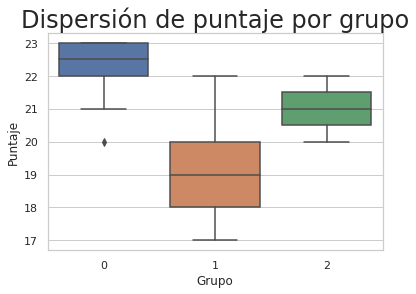

In [90]:
ax = sns.boxplot(x="grupo", y="puntaje", data=data_final_x)
ax.set_xlabel("Grupo")
ax.set_ylabel("Puntaje")
ax.set_title("Dispersión de puntaje por grupo", fontsize=24);

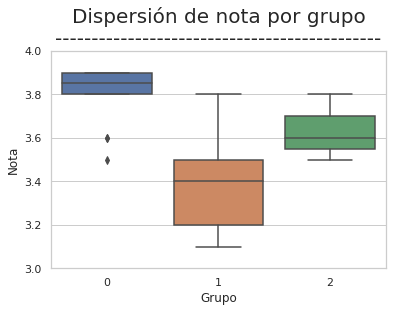

In [89]:
ax = sns.boxplot(x="grupo", y="nota", data=data_final_x)
min_value = np.min(data_final_x.nota)
ax.set_ylim(min_value-0.1,4.0)
ax.set_xlabel("Grupo")
ax.set_ylabel("Nota")
ax.set_title("Dispersión de nota por grupo\n"+"-"*45, fontsize=20);

**Interpetación**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/598px-Boxplot_vs_PDF.svg.png)

In [91]:
def get_describe_by_cluster(data, cluster, selected):
  return data[data.grupo == cluster][selected].describe()

In [92]:
for cluster in np.sort(get_clusters(data_final_x)):
  print("-"*50)
  print("Summary cluster {}".format(cluster))
  print("-"*50)
  print(get_describe_by_cluster(data_final_y, cluster, ['nota', 'puntaje']))

--------------------------------------------------
Summary cluster 0
--------------------------------------------------
            nota    puntaje
count  19.000000  19.000000
mean    3.410526  19.315789
std     0.199707   1.416280
min     3.100000  17.000000
25%     3.200000  18.000000
50%     3.400000  19.000000
75%     3.500000  20.000000
max     3.800000  22.000000
--------------------------------------------------
Summary cluster 1
--------------------------------------------------
            nota    puntaje
count  16.000000  16.000000
mean    3.806250  22.250000
std     0.128938   0.930949
min     3.500000  20.000000
25%     3.800000  22.000000
50%     3.850000  22.500000
75%     3.900000  23.000000
max     3.900000  23.000000
--------------------------------------------------
Summary cluster 2
--------------------------------------------------
           nota  puntaje
count  3.000000      3.0
mean   3.633333     21.0
std    0.152753      1.0
min    3.500000     20.0
25%    3.55

## Guarda resultados

In [93]:
for n_grupo in data_final_x.grupo.unique():
  data_final_x[data_final_x.grupo == n_grupo][['id','nota']].to_csv("Grupo_{}.csv".format(n_grupo), index=False)

In [94]:
for n_grupo in data_final_y.grupo.unique():
  data_final_y[data_final_y.grupo == n_grupo][['id','nota']].to_csv("Grupo_{}_B.csv".format(n_grupo), index=False)

## Más visualizaciones

### Diagrama de violin

Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.

Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos. La barra negra gruesa en el centro representa el intervalo intercuartil, la barra negra fina que se extiende desde ella, representa el 95 % de los intervalos de confianza, y el punto blanco es la mediana.

Los diagramas de cajas y bigotes están limitados a su visualización de los datos, ya que su simplicidad visual tiende a ocultar detalles significativos sobre cómo se distribuyen los valores en los datos. Por ejemplo, con los diagramas de cajas y bigotes no puedes ver si la distribución es bimodal o multimodal. Si bien los diagramas de violín incluyen más información, pueden estar mucho más abarrotados que los diagramas de cajas y bigotes.

![](https://datavizcatalogue.com/ES/metodos/images/anatomy/SVG/diagrama_de_violin.svg)

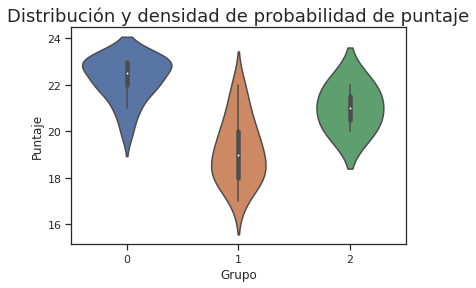

In [128]:
ax=sns.violinplot(x="grupo", y="puntaje", data=data_final_x)
ax.set_title("Distribución y densidad de probabilidad de puntaje", fontsize=18)
ax.set_xlabel("Grupo")
ax.set_ylabel("Puntaje");

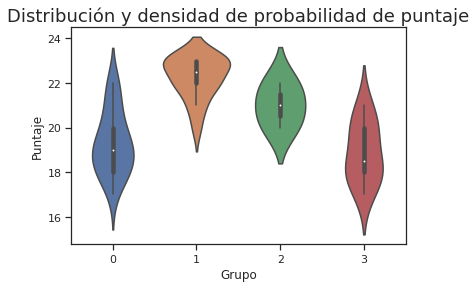

In [129]:
ax=sns.violinplot(x="grupo", y="puntaje", data=data_final_y)
ax.set_title("Distribución y densidad de probabilidad de puntaje", fontsize=18)
ax.set_xlabel("Grupo")
ax.set_ylabel("Puntaje");

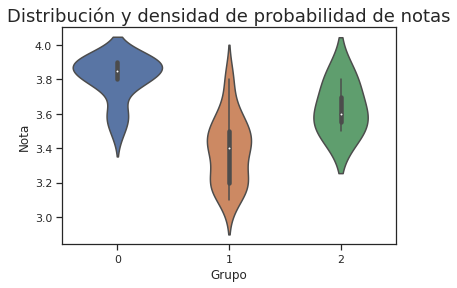

In [116]:
ax = sns.violinplot(x="grupo", y="nota", data=data_final_x)
ax.set_title("Distribución y densidad de probabilidad de notas", fontsize=18)
ax.set_xlabel("Grupo")
ax.set_ylabel("Nota");

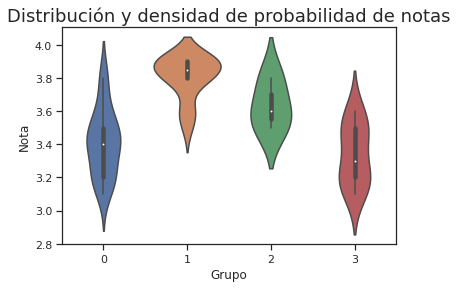

In [119]:
ax = sns.violinplot(x="grupo", y="nota", data=data_final_y)
ax.set_title("Distribución y densidad de probabilidad de notas", fontsize=18)
ax.set_xlabel("Grupo")
ax.set_ylabel("Nota");

## Comparación de modelos

For n_clusters = 2 The average silhouette_score is : 0.9003971803525429
For n_clusters = 3 The average silhouette_score is : 0.9686780831231749
For n_clusters = 4 The average silhouette_score is : 0.8068453806807988
For n_clusters = 5 The average silhouette_score is : 0.7088267288932542
For n_clusters = 6 The average silhouette_score is : 0.6709502013050695


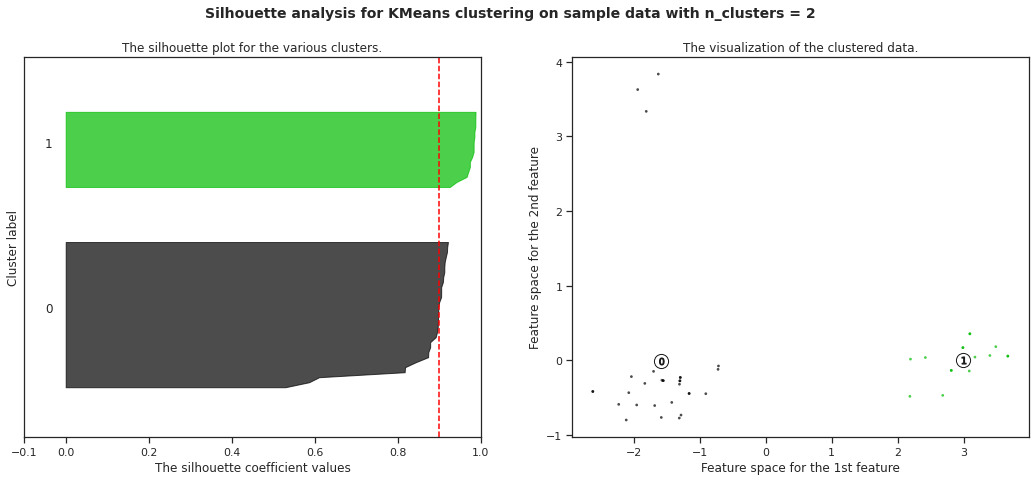

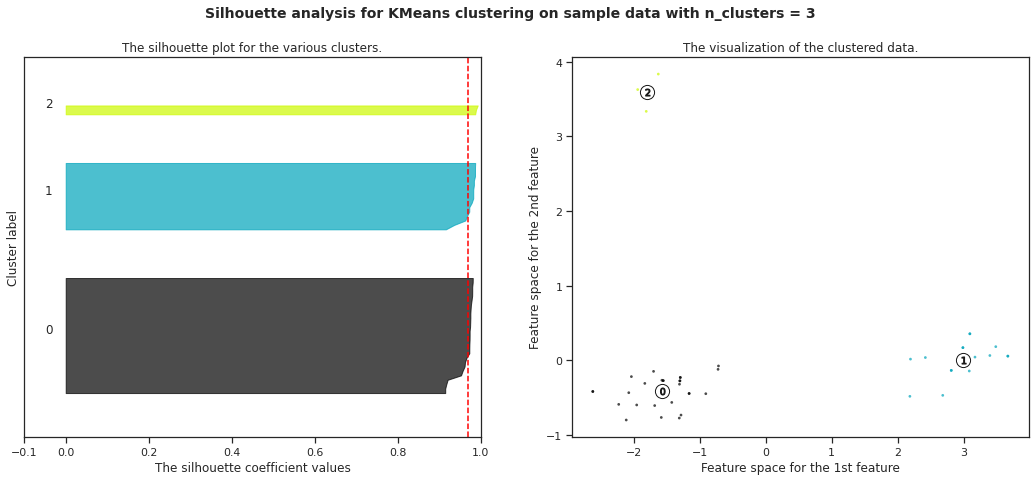

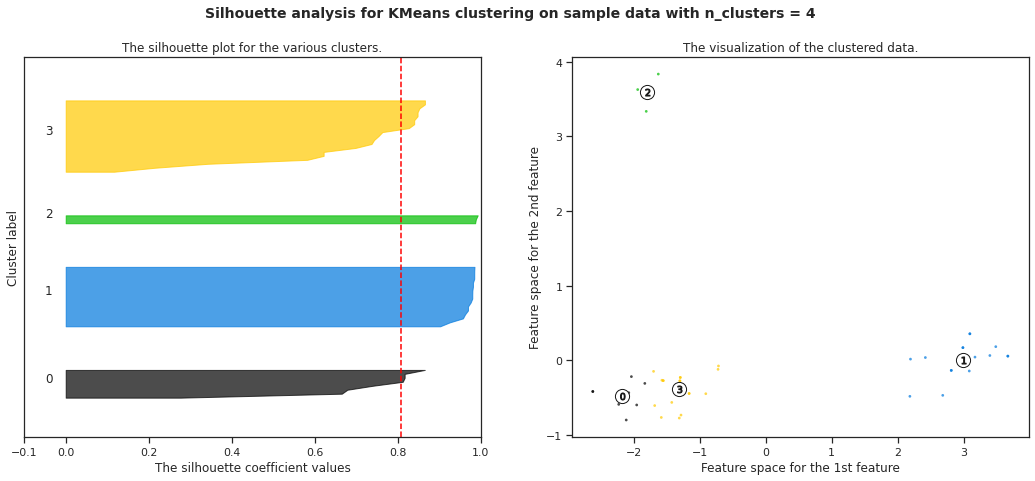

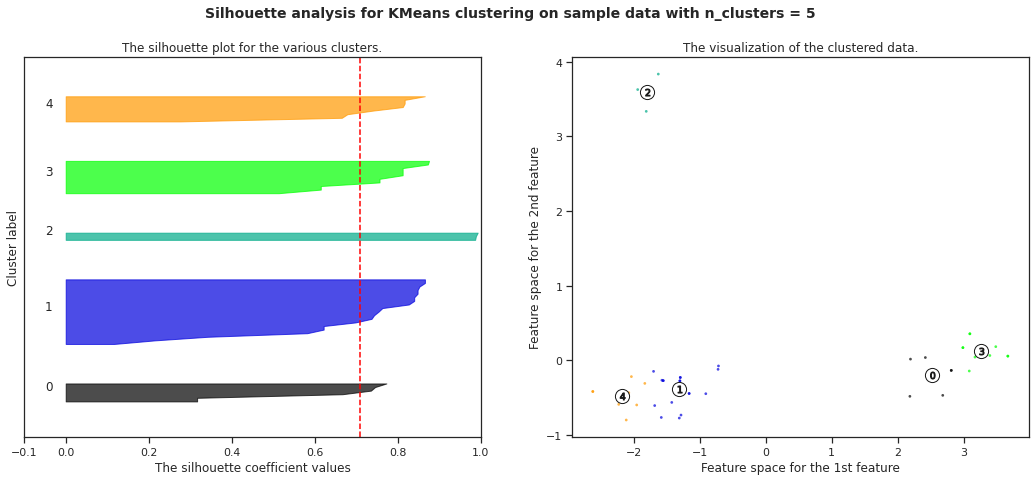

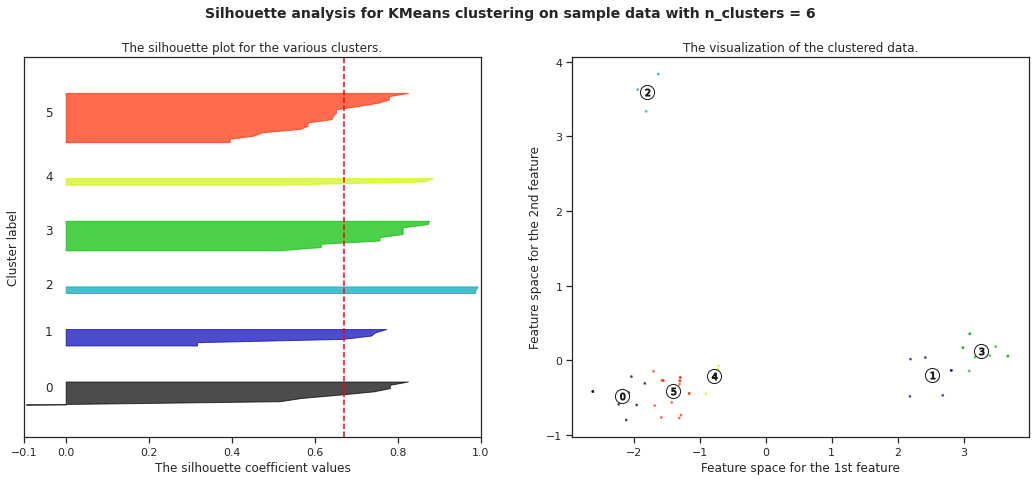

In [111]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PCA_components.iloc[:,:2]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCA_components.iloc[:,:2])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCA_components.iloc[:,:2], cluster_labels, 
                                      metric="sqeuclidean")
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:2], cluster_labels, 
                                                  metric="sqeuclidean")

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        PCA_components[0], PCA_components[1], marker=".", s=30, lw=0, alpha=0.7, 
        c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ddaaf58-075e-4191-8bbb-dc9543aea97c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>